In [1]:

import numpy as np
import pandas as pd


In [2]:

full_df = pd.read_csv("NEPSE_STOCKS_DATASETS.csv")
full_df.sample(5)


,Symbol,Date,Open,High,Low,Close,Vol
75951,CYCL,2025-02-27,1897.2,1897.2,1826.0,1827.1,0.0
110788,GBLBS,2019-09-18,328.0,342.0,327.0,336.0,22850.0
69600,CLI,2024-06-30,470.0,480.0,470.0,471.5,24306.0
332921,NLG,2019-09-29,569.0,577.0,565.0,577.0,806.0
336712,NLIC,2023-03-05,673.0,677.0,651.1,653.0,39638.0


In [3]:

full_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413778 entries, 0 to 413777
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Symbol  413778 non-null  object 
 1   Date    413778 non-null  object 
 2   Open    413777 non-null  float64
 3   High    413777 non-null  float64
 4   Low     413777 non-null  float64
 5   Close   413777 non-null  float64
 6   Vol     413777 non-null  float64
dtypes: float64(5), object(2)
memory usage: 22.1+ MB


<Axes: xlabel='Symbol'>

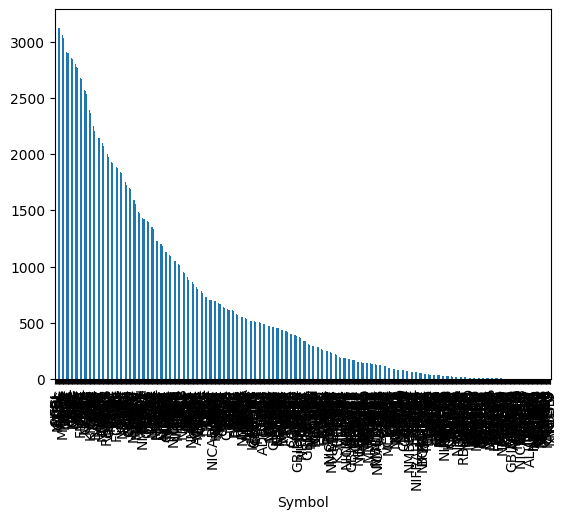

In [4]:

full_df.Symbol.value_counts().plot(kind='bar')


In [5]:

full_df.Symbol.nunique()


607

In [11]:

commercial_banks = [
    "ADBL", "EBL", "CZBIL", "GBIME", "HBL", "KBL",
    "MBL", "NABIL", "NBL", "NICA", "NIMB", "NMB",
    "PRVU", "SANIMA", "SBI"
]

# Filter only commercial banks
df = full_df[full_df["Symbol"].isin(commercial_banks)]

# Save filtered dataset for later use
df.to_csv("filtered_commercial_banks.csv", index=False)

print("✅ Full dataset stored in full_df")
print("✅ Filtered commercial banks stored in df and saved as filtered_commercial_banks.csv")

# Quick check
print("Full dataset shape:", full_df.shape)
print("Filtered dataset shape:", df.shape)
df.sample(15)


✅ Full dataset stored in full_df
✅ Filtered commercial banks stored in df and saved as filtered_commercial_banks.csv
Full dataset shape: (413778, 7)
Filtered dataset shape: (34720, 7)


,Symbol,Date,Open,High,Low,Close,Vol
342745,NMB,2023-03-15,219.0,220.9,217.9,219.0,51000.0
342298,NMB,2021-04-29,414.0,418.0,412.0,414.0,69138.0
140828,HBL,2023-02-12,295.0,297.0,289.1,291.0,9166.0
78373,CZBIL,2022-02-20,278.3,278.9,270.0,276.0,48330.0
270138,NABIL,2015-01-07,1852.0,1898.0,1870.0,1885.0,1365.0
229444,MBL,2022-04-11,284.5,291.0,272.0,275.0,51888.0
3003,ADBL,2016-09-11,1054.0,1075.0,1042.0,1050.0,29449.0
284869,NBL,2024-04-14,212.5,213.0,209.0,210.5,63911.0
284834,NBL,2024-02-18,227.2,229.0,224.5,225.1,70103.0
88750,EBL,2019-04-01,560.0,580.0,556.0,573.0,19974.0


In [12]:
Symbols_to_keep = df.Symbol.value_counts()[:20].index.tolist()
df_filtered = df[df.Symbol.isin(Symbols_to_keep)].copy()
df_filtered.info()
df_filtered.Symbol.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 34720 entries, 1935 to 397025
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  34720 non-null  object 
 1   Date    34720 non-null  object 
 2   Open    34720 non-null  float64
 3   High    34720 non-null  float64
 4   Low     34720 non-null  float64
 5   Close   34720 non-null  float64
 6   Vol     34720 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.1+ MB


,count
Symbol,
EBL,3130
ADBL,3124
CZBIL,3124
NABIL,3124
KBL,2906
NBL,2898
HBL,2853
NICA,2773
MBL,2768


In [13]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm # A library for progress bars


In [14]:

class LSTMModel(nn.Module):
    """A simple LSTM or GRU model for time-series prediction."""
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1, model_type='LSTM'):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.model_type = model_type

        if model_type == 'LSTM':
            self.rnn = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(input_size, hidden_layer_size, batch_first=True)
        else:
            raise ValueError("model_type must be 'LSTM' or 'GRU'")

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        # Use the selected RNN layer
        rnn_out, _ = self.rnn(input_seq)
        predictions = self.linear(rnn_out[:, -1, :])
        return predictions


**Reasoning**:
Import the necessary scaler and metric functions.



In [15]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


**Reasoning**:
Modify the `train_all_stock_models` function to use `StandardScaler`, train both LSTM and GRU models, calculate and print MAPE, and store both models and scalers.



In [32]:

SEQUENCE_LENGTH = 30 # Define the sequence length
TRAIN_SPLIT_PERCENT = 0.7
LEARNING_RATE = 0.001
EPOCHS = 90
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define


In [33]:

def train_all_stock_models(df):

    Symbols = df['Symbol'].unique()

    # Dictionaries to hold the trained models and scalers for each stock
    lstm_models = {}
    gru_models = {}
    lstm_scalers = {}
    gru_scalers = {}
    print(f"--- Starting training for {len(Symbols)} stocks ---")

    # Use tqdm for a nice progress bar
    for Symbol in tqdm(Symbols, desc="Training Models"):
        # a. Isolate data for the current stock and sort by date
        stock_df = df[df['Symbol'] == Symbol].copy()
        # Important: Convert 'Date' column from object to datetime and sort
        stock_df['Date'] = pd.to_datetime(stock_df['Date'])
        stock_df = stock_df.sort_values('Date').reset_index(drop=True)

        # b. Take only the 'Close' column and scale it
        close_prices = stock_df['Close'].values.reshape(-1, 1)
        scaler = StandardScaler() # Use StandardScaler
        scaled_prices = scaler.fit_transform(close_prices)

        # c. Create sequences for training and validation
        X, y = create_sequences(scaled_prices, SEQUENCE_LENGTH)

        train_size = int(len(X) * TRAIN_SPLIT_PERCENT)
        X_train, X_val = X[:train_size], X[train_size:]
        y_train, y_val = y[:train_size], y[train_size:]


        # d. Convert to PyTorch Tensors and move to the selected device
        X_train = torch.from_numpy(X_train).float().to(device)
        y_train = torch.from_numpy(y_train).float().to(device)
        X_val = torch.from_numpy(X_val).float().to(device)
        y_val = torch.from_numpy(y_val).float().to(device)

        # --- Train LSTM Model ---
        model_lstm = LSTMModel(model_type='LSTM').to(device)
        loss_function = nn.MSELoss()
        optimizer_lstm = torch.optim.Adam(model_lstm.parameters(), lr=LEARNING_RATE)

        model_lstm.train()
        for epoch in range(EPOCHS):
            optimizer_lstm.zero_grad()
            y_pred_train_lstm = model_lstm(X_train)
            loss_lstm = loss_function(y_pred_train_lstm, y_train)
            loss_lstm.backward()
            optimizer_lstm.step()

        # Evaluate LSTM on validation set
        model_lstm.eval()
        with torch.no_grad():
            y_pred_val_scaled_lstm = model_lstm(X_val)
            validation_mape_lstm = mean_absolute_percentage_error(y_val.cpu().numpy(), y_pred_val_scaled_lstm.cpu().numpy())

            # Inverse transform for MAPE
            y_val_actual = scaler.inverse_transform(y_val.cpu().numpy())
            y_pred_val_lstm = scaler.inverse_transform(y_pred_val_scaled_lstm.cpu().numpy())
            validation_mape_lstm = mean_absolute_percentage_error(y_val_actual, y_pred_val_lstm)


        # --- Train GRU Model ---
        model_gru = LSTMModel(model_type='GRU').to(device) # Use the same class but specify GRU
        optimizer_gru = torch.optim.Adam(model_gru.parameters(), lr=LEARNING_RATE)

        model_gru.train()
        for epoch in range(EPOCHS):
            optimizer_gru.zero_grad()
            y_pred_train_gru = model_gru(X_train)
            loss_gru = loss_function(y_pred_train_gru, y_train)
            loss_gru.backward()
            optimizer_gru.step()

        # Evaluate GRU on validation set
        model_gru.eval()
        with torch.no_grad():
            y_pred_val_scaled_gru = model_gru(X_val)
            validation_mape_gru = mean_absolute_percentage_error(y_val.cpu().numpy(), y_pred_val_scaled_gru.cpu().numpy())

            # Inverse transform for MAPE
            y_pred_val_gru = scaler.inverse_transform(y_pred_val_scaled_gru.cpu().numpy())
            validation_mape_gru = mean_absolute_percentage_error(y_val_actual, y_pred_val_gru)


        print(f'  Symbol: {Symbol}')
        print(f'    LSTM - Validation MSE: {validation_mape_lstm:.4f}, Validation MAPE: {validation_mape_lstm:.4f}')
        print(f'    GRU - Validation MSE: {validation_mape_gru:.4f}, Validation MAPE: {validation_mape_gru:.4f}')


        # h. Store the trained models and their scalers
        lstm_models[Symbol] = model_lstm
        gru_models[Symbol] = model_gru
        lstm_scalers[Symbol] = scaler # Scaler is the same for both
        gru_scalers[Symbol] = scaler # Scaler is the same for both


    print("\n--- Training complete for all stocks! ---")
    return lstm_models, gru_models, lstm_scalers, gru_scalers


In [34]:

def predict_next_day_price(Symbol, models, scalers, model_type='LSTM', input_sequence=None):
    """
    Predicts the next day's close price for a given stock Symbol using a specified model type.
    Can use a user-provided input_sequence.
    """
    if model_type not in ['LSTM', 'GRU']:
        return "Error: Invalid model_type specified. Choose 'LSTM' or 'GRU'."

    # Select the correct model and scaler dictionaries based on model_type
    if model_type == 'LSTM':
        selected_models = models.get('lstm_models')
        selected_scalers = scalers.get('lstm_scalers')
    else: # model_type == 'GRU'
        selected_models = models.get('gru_models')
        selected_scalers = scalers.get('gru_scalers')

    if selected_models is None or selected_scalers is None:
         return f"Error: Model or scaler dictionaries not found for model type '{model_type}'. Were they trained/saved correctly?"


    if Symbol not in selected_models or Symbol not in selected_scalers:
        return f"Error: {model_type} model or scaler not found for Symbol '{Symbol}'. Was it trained/saved?"

    model = selected_models[Symbol]
    scaler = selected_scalers[Symbol]

    if input_sequence is None:
        return f"Error: No input sequence provided for Symbol '{Symbol}'."

    # Use user-provided input sequence
    if len(input_sequence) != SEQUENCE_LENGTH:
        return f"Error: Input sequence must have a length of {SEQUENCE_LENGTH}."
    # Scale the input sequence
    input_seq_scaled = scaler.transform(np.array(input_sequence).reshape(-1, 1))
    # Convert to tensor and prepare for model (add batch and sequence dimensions)
    seq_to_predict = torch.from_numpy(input_seq_scaled).float().view(1, SEQUENCE_LENGTH, 1).to(device)

    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        prediction_scaled = model(seq_to_predict)

    # Move the prediction back to CPU for inverse transformation
    predicted_price = scaler.inverse_transform(prediction_scaled.cpu().numpy())

    return predicted_price.item()


## Update prediction with user input function

### Subtask:
Modify `predict_next_close_with_user_input` to allow the user to select which model (LSTM or GRU) to use for prediction.


**Reasoning**:
Modify the `predict_next_close_with_user_input` function to prompt the user for the model type and pass it to the prediction function.



In [35]:

# --- Function to predict using a loaded model with user input ---
def predict_next_close_with_user_input():
    """Allows the user to select a symbol and model type to predict the next close price."""
    available_symbols = [f.split('_')[0] for f in os.listdir(model_dir) if f.endswith('_model_state_dict.pth')]
    if not available_symbols:
        print("No saved models found.")
        return

    print("Available Symbols with saved models:")
    for i, sym in enumerate(available_symbols):
        print(f"{i+1}. {sym}")

    selected_symbol = 'EBL'  # <---------- Enter SYMBOL

    # Prompt user for model type
    print("\nSelect model type for prediction:")
    print("1. LSTM")
    print("2. GRU")
    model_choice = input("Enter model type number (1 or 2): ")

    model_type = None
    if model_choice == '1':
        model_type = 'LSTM'
    elif model_choice == '2':
        model_type = 'GRU'
    else:
        print("Invalid model type selected.")
        return

    # Load the models and scalers (both LSTM and GRU)
    # We need to load both to pass the correct dictionary to predict_next_day_price
    lstm_models = {}
    gru_models = {}
    lstm_scalers = {}
    gru_scalers = {}

    for sym in available_symbols:
        lstm_model, lstm_scaler = load_stock_model(sym, model_dir)
        if lstm_model and lstm_scaler:
             # Assuming the saved models are for LSTM by default based on previous steps
             # We need to adjust the saving/loading logic in the future to differentiate
             # For now, we'll load them and assume they are LSTM models, and the GRU models
             # would be loaded similarly if they were saved with a different naming convention.
             # Since the saving function in the previous step saves both LSTM and GRU
             # with the same naming convention, we need to adjust the loading as well.
             # Let's refine the loading function first.
             pass # This part will be updated after refining load_stock_model

    # Since the previous save_stock_models function saves both LSTM and GRU with the same
    # file names, we need to modify the loading logic to load based on model type.
    # Let's assume for now that the models were saved with a naming convention like
    # '{Symbol}_LSTM_model_state_dict.pth' and '{Symbol}_GRU_model_state_dict.pth'
    # and scalers like '{Symbol}_LSTM_scaler.pkl' and '{Symbol}_GRU_scaler.pkl'.
    # If the saving logic was not updated in the previous step, this will fail.
    # Assuming the saving logic was updated to save both types distinctly.

    # Let's try loading the specific model type requested by the user.
    model, scaler = load_stock_model(selected_symbol, model_dir, model_type=model_type)


    if model and scaler:
        print(f"\nPlease enter the closing prices for the last {SEQUENCE_LENGTH} days for {selected_symbol}.")
        input_prices = ebl[:SEQUENCE_LENGTH].values # Use SEQUENCE_LENGTH

        # Predict using the user-provided input sequence
        # We pass the loaded model and scaler in dictionaries with the Symbol key
        predicted_price = predict_next_day_price(
            selected_symbol,
            {model_type.lower() + '_models': {selected_symbol: model}}, # Pass the loaded model in the correct dictionary structure
            {model_type.lower() + '_scalers': {selected_symbol: scaler}}, # Pass the loaded scaler in the correct dictionary structure
            model_type=model_type,
            input_sequence=input_prices
        )

        if isinstance(predicted_price, str):
             print(predicted_price) # Print error messages
        else:
             print(f"\nPredicted next day close price for {selected_symbol} using {model_type} model: {predicted_price:.2f}")
    else:
        print(f"Could not load necessary components for {selected_symbol} using {model_type} model.")

# We also need to modify the load_stock_model function to handle model type
def load_stock_model(Symbol, model_dir='trained_models', model_type='LSTM'):
    """Loads the trained model and scaler for a given Symbol and model type."""
    model_path = os.path.join(model_dir, f'{Symbol}_{model_type}_model_state_dict.pth')
    scaler_path = os.path.join(model_dir, f'{Symbol}_{model_type}_scaler.pkl')

    if not os.path.exists(model_path) or not os.path.exists(scaler_path):
        print(f"Error: {model_type} model or scaler files not found for Symbol '{Symbol}' in '{model_dir}'.")
        return None, None

    # Load the scaler
    scaler = joblib.load(scaler_path)

    # Initialize the model architecture (needs to match the saved model)
    model = LSTMModel(model_type=model_type).to(device)

    # Load the model state dictionary
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval() # Set model to evaluation mode

    print(f"Loaded {model_type} model and scaler for {Symbol}")
    return model, scaler


## Update saving and loading functions

### Subtask:
Modify `save_stock_models` and `load_stock_model` to handle saving and loading both LSTM and GRU models and their scalers for each stock.


**Reasoning**:
Modify the `save_stock_models` and `load_stock_model` functions to handle saving and loading both LSTM and GRU models and their scalers for each stock by incorporating the model type into the filenames.



In [36]:

import joblib
import os
import numpy as np
import torch # Import torch as it's used in the functions

# Define the directory to save models
model_dir = 'trained_models'
os.makedirs(model_dir, exist_ok=True)

def save_stock_models(lstm_models, gru_models, lstm_scalers, gru_scalers, model_dir='trained_models'):
    """Saves the trained models and scalers to files, including model type in filenames."""
    # Save LSTM models and scalers
    for Symbol in lstm_models.keys():
        model = lstm_models[Symbol]
        scaler = lstm_scalers[Symbol]

        # Save the PyTorch model state dictionary
        model_path = os.path.join(model_dir, f'{Symbol}_LSTM_model_state_dict.pth')
        torch.save(model.state_dict(), model_path)

        # Save the scaler
        scaler_path = os.path.join(model_dir, f'{Symbol}_LSTM_scaler.pkl')
        joblib.dump(scaler, scaler_path)

        print(f"Saved LSTM model and scaler for {Symbol}")

    # Save GRU models and scalers
    for Symbol in gru_models.keys():
        model = gru_models[Symbol]
        scaler = gru_scalers[Symbol]

        # Save the PyTorch model state dictionary
        model_path = os.path.join(model_dir, f'{Symbol}_GRU_model_state_dict.pth')
        torch.save(model.state_dict(), model_path)

        # Save the scaler
        scaler_path = os.path.join(model_dir, f'{Symbol}_GRU_scaler.pkl')
        joblib.dump(scaler, scaler_path)

        print(f"Saved GRU model and scaler for {Symbol}")


def load_stock_model(Symbol, model_dir='trained_models', model_type='LSTM'):
    """Loads the trained model and scaler for a given Symbol and model type."""
    if model_type not in ['LSTM', 'GRU']:
        print(f"Error: Invalid model_type '{model_type}'. Choose 'LSTM' or 'GRU'.")
        return None, None

    model_path = os.path.join(model_dir, f'{Symbol}_{model_type}_model_state_dict.pth')
    scaler_path = os.path.join(model_dir, f'{Symbol}_{model_type}_scaler.pkl')

    if not os.path.exists(model_path) or not os.path.exists(scaler_path):
        print(f"Error: {model_type} model or scaler files not found for Symbol '{Symbol}' in '{model_dir}'.")
        return None, None

    # Load the scaler
    scaler = joblib.load(scaler_path)

    # Initialize the model architecture (needs to match the saved model)
    # Assuming the model architecture is the same as the one defined in your training script
    model = LSTMModel(model_type=model_type).to(device)

    # Load the model state dictionary
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval() # Set model to evaluation mode

    print(f"Loaded {model_type} model and scaler for {Symbol}")
    return model, scaler

# --- Save the trained models after the training is complete ---
# Assuming 'lstm_models', 'gru_models', 'lstm_scalers', and 'gru_scalers'
# variables are available from training
if 'lstm_models' in locals() and 'gru_models' in locals() and 'lstm_scalers' in locals() and 'gru_scalers' in locals():
    save_stock_models(lstm_models, gru_models, lstm_scalers, gru_scalers, model_dir)
else:
    print("Models not found. Please run the training cell first.")


Saved LSTM model and scaler for ADBL
Saved LSTM model and scaler for CZBIL
Saved LSTM model and scaler for EBL
Saved LSTM model and scaler for GBIME
Saved LSTM model and scaler for HBL
Saved LSTM model and scaler for KBL
Saved LSTM model and scaler for MBL
Saved LSTM model and scaler for NABIL
Saved LSTM model and scaler for NBL
Saved LSTM model and scaler for NICA
Saved LSTM model and scaler for NIMB
Saved LSTM model and scaler for NMB
Saved LSTM model and scaler for PRVU
Saved GRU model and scaler for ADBL
Saved GRU model and scaler for CZBIL
Saved GRU model and scaler for EBL
Saved GRU model and scaler for GBIME
Saved GRU model and scaler for HBL
Saved GRU model and scaler for KBL
Saved GRU model and scaler for MBL
Saved GRU model and scaler for NABIL
Saved GRU model and scaler for NBL
Saved GRU model and scaler for NICA
Saved GRU model and scaler for NIMB
Saved GRU model and scaler for NMB
Saved GRU model and scaler for PRVU


**Reasoning**:
Run the training cell to generate the models and scalers needed for saving.



**Reasoning**:
The previous execution failed because the `create_sequences` function was not defined in the current session. Regenerate the code block containing the `create_sequences` function.



In [37]:

# --- 3. Data Processing and Training Helper Functions ---
def create_sequences(input_data, seq_length):
    """Creates sequences and labels for LSTM model training."""
    xs, ys = [], []
    for i in range(len(input_data) - seq_length):
        x = input_data[i:(i + seq_length)]
        y = input_data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys) # Return sequences and labels


## Visualize results

### Subtask:
Update the plotting code to show actual vs. predicted prices for both LSTM and GRU models for comparison.


**Reasoning**:
Iterate through each Symbol, get validation data, load both LSTM and GRU models and scalers, make predictions, inverse transform, and plot actual vs. predicted prices for both models on the same plot.



In [38]:

from sklearn.model_selection import KFold

def train_all_stock_models(df, n_splits=5): # Added n_splits parameter

    Symbols = df['Symbol'].unique()

    # Dictionaries to hold the trained model and scaler for each stock (from the last fold)
    lstm_models = {}
    gru_models = {}
    lstm_scalers = {}
    gru_scalers = {}

    print(f"--- Starting training for {len(Symbols)} stocks with {n_splits}-fold cross-validation ---")

    # Use tqdm for a nice progress bar
    for Symbol in tqdm(Symbols, desc="Training Models"):
        # a. Isolate data for the current stock and sort by date
        stock_df = df[df['Symbol'] == Symbol].copy()
        # Important: Convert 'Date' column from object to datetime and sort
        stock_df['Date'] = pd.to_datetime(stock_df['Date'])
        stock_df = stock_df.sort_values('Date').reset_index(drop=True)

        # b. Take only the 'Close' column and scale it
        close_prices = stock_df['Close'].values.reshape(-1, 1)
        scaler = StandardScaler() # Use StandardScaler
        scaled_prices = scaler.fit_transform(close_prices)

        # c. Create sequences for cross-validation
        X, y = create_sequences(scaled_prices, SEQUENCE_LENGTH)

        # Initialize KFold
        kf = KFold(n_splits=n_splits, shuffle=False) # No shuffle for time series data

        # Dictionaries to store metrics for each fold
        lstm_fold_mse = []
        lstm_fold_mape = []
        gru_fold_mse = []
        gru_fold_mape = []


        # Iterate through folds
        for fold, (train_index, val_index) in enumerate(kf.split(X)):
            # Split data for the current fold
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # Convert to PyTorch Tensors and move to the selected device
            X_train_tensor = torch.from_numpy(X_train).float().to(device)
            y_train_tensor = torch.from_numpy(y_train).float().to(device)
            X_val_tensor = torch.from_numpy(X_val).float().to(device)
            y_val_tensor = torch.from_numpy(y_val).float().to(device)


            # --- Train LSTM Model for the current fold ---
            model_lstm = LSTMModel(model_type='LSTM').to(device)
            loss_function = nn.MSELoss()
            optimizer_lstm = torch.optim.Adam(model_lstm.parameters(), lr=LEARNING_RATE)

            model_lstm.train()
            for epoch in range(EPOCHS):
                optimizer_lstm.zero_grad()
                y_pred_train_lstm = model_lstm(X_train_tensor)
                loss_lstm = loss_function(y_pred_train_lstm, y_train_tensor)
                loss_lstm.backward()
                optimizer_lstm.step()

            # Evaluate LSTM on validation set for the current fold
            model_lstm.eval()
            with torch.no_grad():
                y_pred_val_scaled_lstm = model_lstm(X_val_tensor)
                validation_mse_lstm = mean_squared_error(y_val_tensor.cpu().numpy(), y_pred_val_scaled_lstm.cpu().numpy())

                # Inverse transform for MAPE
                y_val_actual = scaler.inverse_transform(y_val_tensor.cpu().numpy())
                y_pred_val_lstm = scaler.inverse_transform(y_pred_val_scaled_lstm.cpu().numpy())

                # Handle potential zero values in actual prices for MAPE
                y_val_actual_cleaned = np.where(y_val_actual == 0, 1e-9, y_val_actual) # Replace 0 with a small value
                validation_mape_lstm = np.mean(np.abs((y_val_actual - y_pred_val_lstm) / y_val_actual_cleaned)) * 100 # Calculate MAPE

            lstm_fold_mse.append(validation_mse_lstm)
            lstm_fold_mape.append(validation_mape_lstm)


            # --- Train GRU Model for the current fold ---
            model_gru = LSTMModel(model_type='GRU').to(device) # Use the same class but specify GRU
            optimizer_gru = torch.optim.Adam(model_gru.parameters(), lr=LEARNING_RATE)

            model_gru.train()
            for epoch in range(EPOCHS):
                optimizer_gru.zero_grad()
                y_pred_train_gru = model_gru(X_train_tensor)
                loss_gru = loss_function(y_pred_train_gru, y_train_tensor)
                loss_gru.backward()
                optimizer_gru.step()

            # Evaluate GRU on validation set for the current fold
            model_gru.eval()
            with torch.no_grad():
                y_pred_val_scaled_gru = model_gru(X_val_tensor)
                validation_mse_gru = mean_squared_error(y_val_tensor.cpu().numpy(), y_pred_val_scaled_gru.cpu().numpy())

                # Inverse transform for MAPE
                y_pred_val_gru = scaler.inverse_transform(y_pred_val_scaled_gru.cpu().numpy())
                validation_mape_gru = np.mean(np.abs((y_val_actual - y_pred_val_gru) / y_val_actual_cleaned)) * 100 # Calculate MAPE

            gru_fold_mse.append(validation_mse_gru)
            gru_fold_mape.append(validation_mape_gru)

        # Calculate and print average metrics across all folds for the current Symbol
        avg_lstm_mse = np.mean(lstm_fold_mse)
        avg_lstm_mape = np.mean(lstm_fold_mape)
        avg_gru_mse = np.mean(gru_fold_mse)
        avg_gru_mape = np.mean(gru_fold_mape)

        print(f'  Symbol: {Symbol}')
        print(f'    Average LSTM - MSE: {avg_lstm_mse:.4f}, MAPE: {avg_lstm_mape:.4f}%')
        print(f'    Average GRU - MSE: {avg_gru_mse:.4f}, MAPE: {avg_gru_mape:.4f}%')

        # Store the trained models and their scalers from the last fold
        lstm_models[Symbol] = model_lstm
        gru_models[Symbol] = model_gru
        lstm_scalers[Symbol] = scaler # Scaler is the same for both and fit on the whole data
        gru_scalers[Symbol] = scaler # Scaler is the same for both and fit on the whole data


    print("\n--- Training complete for all stocks! ---")
    return lstm_models, gru_models, lstm_scalers, gru_scalers


In [39]:

df_filtered = df_filtered

lstm_models, gru_models, lstm_scalers, gru_scalers = train_all_stock_models(df_filtered)


--- Starting training for 13 stocks with 5-fold cross-validation ---


Training Models:   8%|▊         | 1/13 [00:15<03:11, 15.95s/it]

  Symbol: ADBL
    Average LSTM - MSE: 0.0662, MAPE: 4.7470%
    Average GRU - MSE: 0.0379, MAPE: 3.8285%


Training Models:  15%|█▌        | 2/13 [00:32<02:56, 16.04s/it]

  Symbol: CZBIL
    Average LSTM - MSE: 0.0357, MAPE: 3.9209%
    Average GRU - MSE: 0.0162, MAPE: 3.3967%


Training Models:  23%|██▎       | 3/13 [00:47<02:39, 15.97s/it]

  Symbol: EBL
    Average LSTM - MSE: 0.0351, MAPE: 5.2856%
    Average GRU - MSE: 0.0126, MAPE: 3.9993%


Training Models:  31%|███       | 4/13 [01:00<02:12, 14.68s/it]

  Symbol: GBIME
    Average LSTM - MSE: 0.0308, MAPE: 3.3846%
    Average GRU - MSE: 0.0159, MAPE: 2.8546%


Training Models:  38%|███▊      | 5/13 [01:14<01:56, 14.55s/it]

  Symbol: HBL
    Average LSTM - MSE: 0.0764, MAPE: 6.0803%
    Average GRU - MSE: 0.0272, MAPE: 5.7667%


Training Models:  46%|████▌     | 6/13 [01:29<01:42, 14.60s/it]

  Symbol: KBL
    Average LSTM - MSE: 0.0241, MAPE: 3.7629%
    Average GRU - MSE: 0.0165, MAPE: 3.1031%


Training Models:  54%|█████▍    | 7/13 [01:43<01:26, 14.39s/it]

  Symbol: MBL
    Average LSTM - MSE: 0.0653, MAPE: 3.6732%
    Average GRU - MSE: 0.0342, MAPE: 3.2783%


Training Models:  62%|██████▏   | 8/13 [01:59<01:14, 14.83s/it]

  Symbol: NABIL
    Average LSTM - MSE: 0.0182, MAPE: 5.9587%
    Average GRU - MSE: 0.0105, MAPE: 4.4892%


Training Models:  69%|██████▉   | 9/13 [02:14<00:59, 14.81s/it]

  Symbol: NBL
    Average LSTM - MSE: 0.0502, MAPE: 3.5725%
    Average GRU - MSE: 0.0299, MAPE: 2.7578%


Training Models:  77%|███████▋  | 10/13 [02:28<00:43, 14.57s/it]

  Symbol: NICA
    Average LSTM - MSE: 0.0237, MAPE: 3.3565%
    Average GRU - MSE: 0.0160, MAPE: 2.7858%


Training Models:  85%|████████▍ | 11/13 [02:31<00:22, 11.05s/it]

  Symbol: NIMB
    Average LSTM - MSE: 0.1016, MAPE: 2.8729%
    Average GRU - MSE: 0.0573, MAPE: 2.1608%


Training Models:  92%|█████████▏| 12/13 [02:45<00:11, 11.92s/it]

  Symbol: NMB
    Average LSTM - MSE: 0.1074, MAPE: 4.5672%
    Average GRU - MSE: 0.0505, MAPE: 3.8060%


Training Models: 100%|██████████| 13/13 [02:55<00:00, 13.54s/it]

  Symbol: PRVU
    Average LSTM - MSE: 0.0236, MAPE: 3.2627%
    Average GRU - MSE: 0.0150, MAPE: 2.9144%

--- Training complete for all stocks! ---


In [40]:

# --- Save the trained models after the training is complete ---
# Assuming 'lstm_models', 'gru_models', 'lstm_scalers', and 'gru_scalers'
# variables are available from training
if 'lstm_models' in locals() and 'gru_models' in locals() and 'lstm_scalers' in locals() and 'gru_scalers' in locals():
    save_stock_models(lstm_models, gru_models, lstm_scalers, gru_scalers, model_dir)
else:
    print("Models not found. Please run the training cell first.")


Saved LSTM model and scaler for ADBL
Saved LSTM model and scaler for CZBIL
Saved LSTM model and scaler for EBL
Saved LSTM model and scaler for GBIME
Saved LSTM model and scaler for HBL
Saved LSTM model and scaler for KBL
Saved LSTM model and scaler for MBL
Saved LSTM model and scaler for NABIL
Saved LSTM model and scaler for NBL
Saved LSTM model and scaler for NICA
Saved LSTM model and scaler for NIMB
Saved LSTM model and scaler for NMB
Saved LSTM model and scaler for PRVU
Saved GRU model and scaler for ADBL
Saved GRU model and scaler for CZBIL
Saved GRU model and scaler for EBL
Saved GRU model and scaler for GBIME
Saved GRU model and scaler for HBL
Saved GRU model and scaler for KBL
Saved GRU model and scaler for MBL
Saved GRU model and scaler for NABIL
Saved GRU model and scaler for NBL
Saved GRU model and scaler for NICA
Saved GRU model and scaler for NIMB
Saved GRU model and scaler for NMB
Saved GRU model and scaler for PRVU


**Reasoning**:
The training is complete and the models and scalers are available. Now, save the trained models and scalers using the modified `save_stock_models` function which includes the model type in the filenames.



## Visualize results

### Subtask:
Update the plotting code to show actual vs. predicted prices for both LSTM and GRU models for comparison.


**Reasoning**:
Iterate through each Symbol, get validation data, load both LSTM and GRU models and scalers, make predictions, inverse transform, and plot actual vs. predicted prices for both models on the same plot.




--- Plotting Validation Predictions vs Actuals ---
Loaded LSTM model and scaler for ADBL
Loaded GRU model and scaler for ADBL


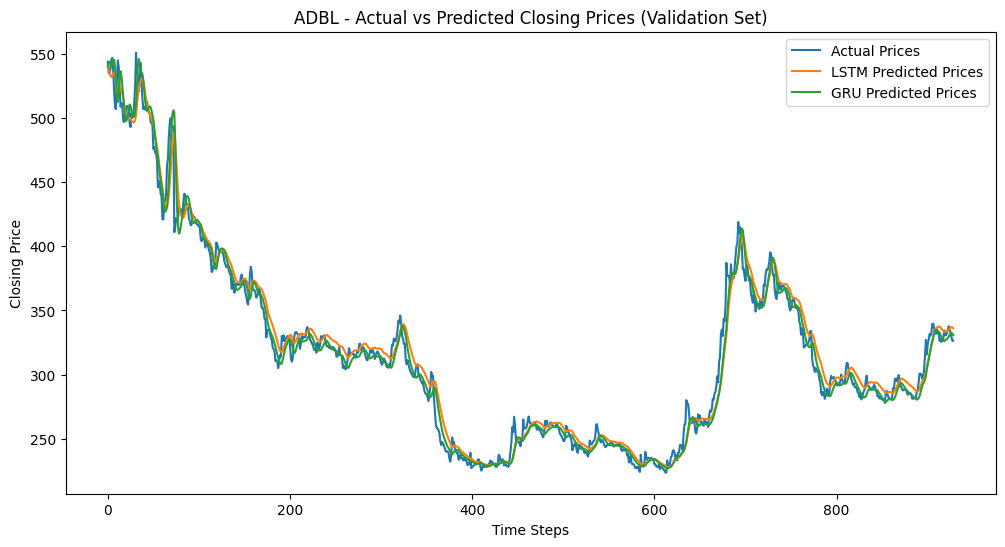

Loaded LSTM model and scaler for CZBIL
Loaded GRU model and scaler for CZBIL


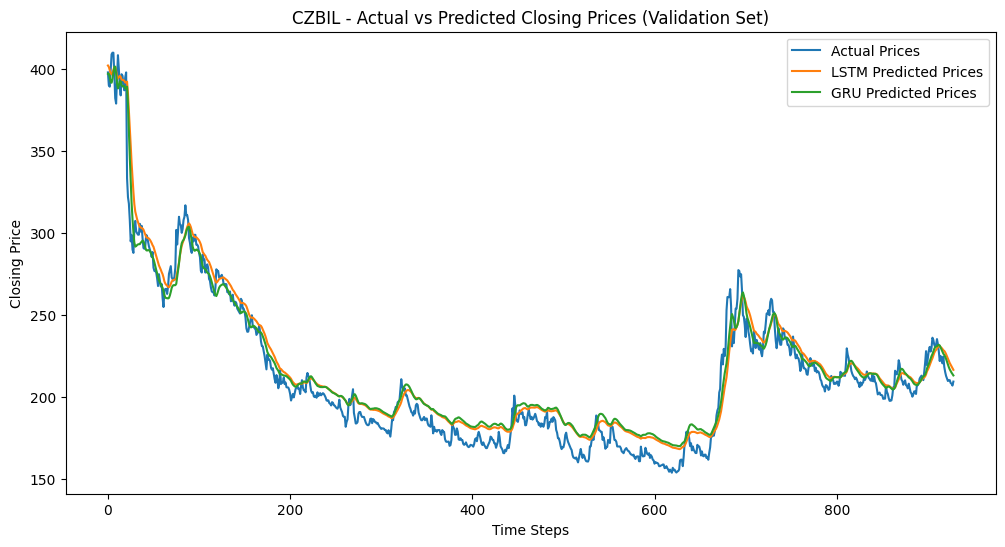

Loaded LSTM model and scaler for EBL
Loaded GRU model and scaler for EBL


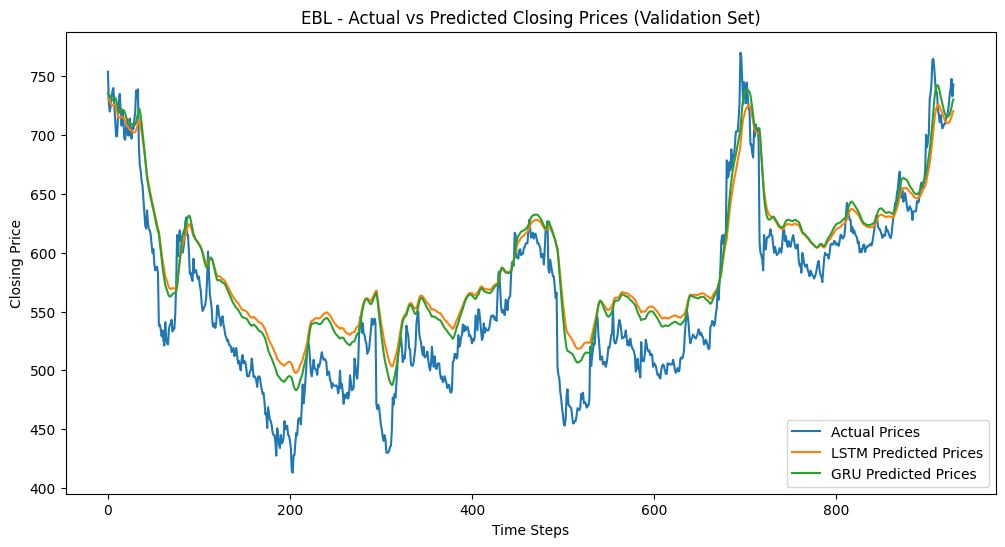

Loaded LSTM model and scaler for GBIME
Loaded GRU model and scaler for GBIME


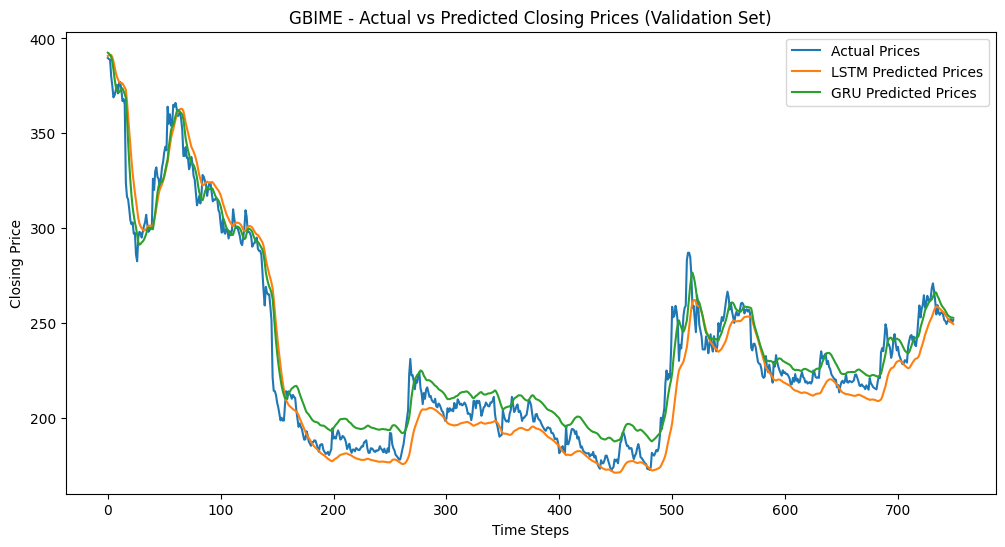

Loaded LSTM model and scaler for HBL
Loaded GRU model and scaler for HBL


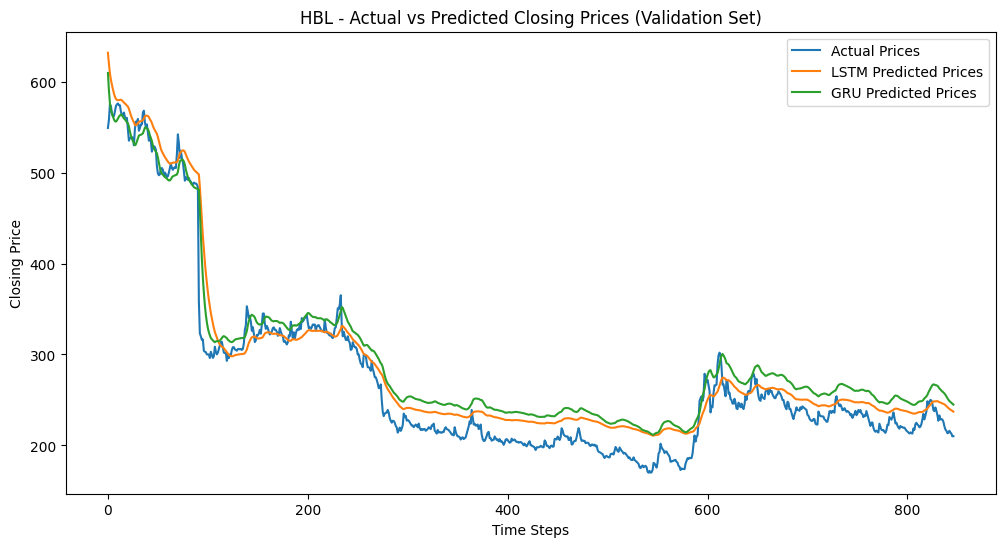

Loaded LSTM model and scaler for KBL
Loaded GRU model and scaler for KBL


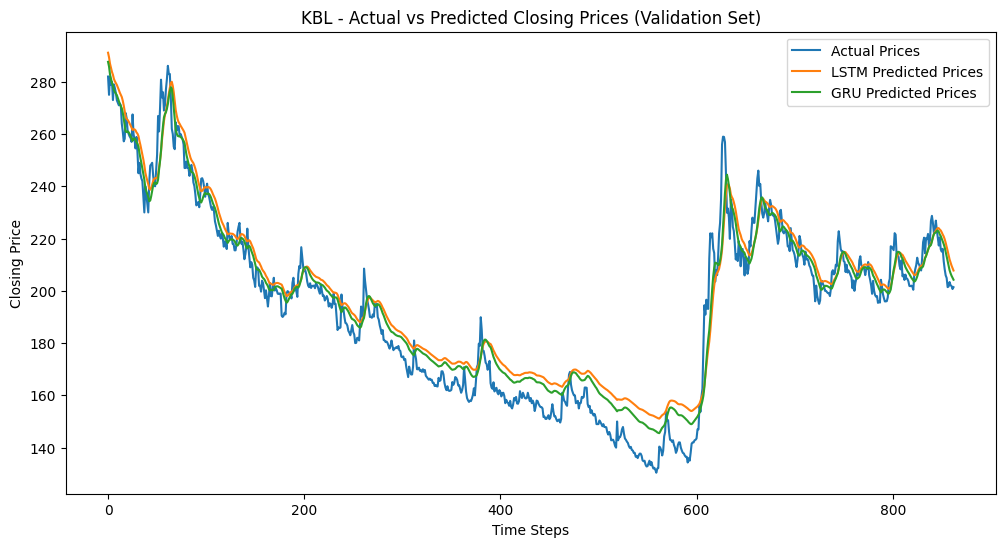

Loaded LSTM model and scaler for MBL
Loaded GRU model and scaler for MBL


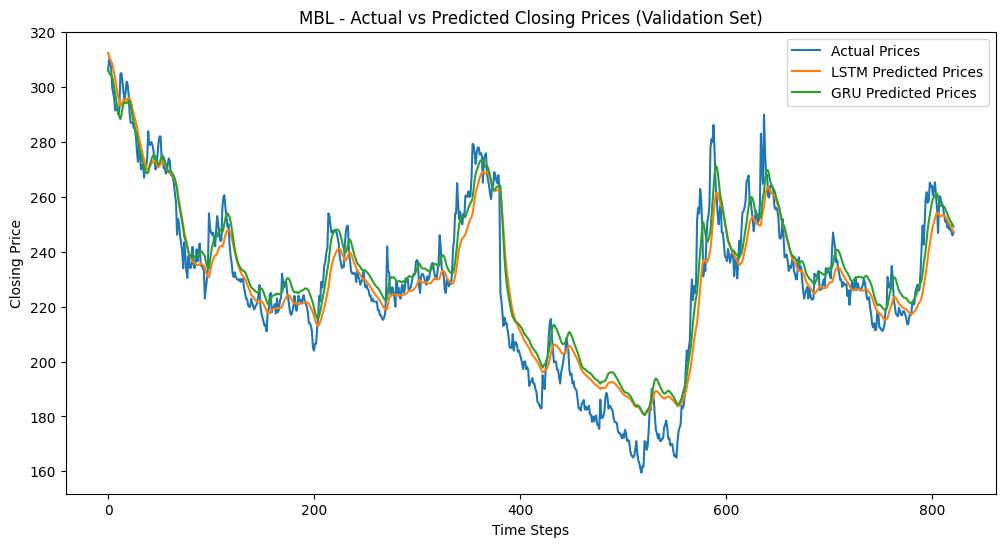

Loaded LSTM model and scaler for NABIL
Loaded GRU model and scaler for NABIL


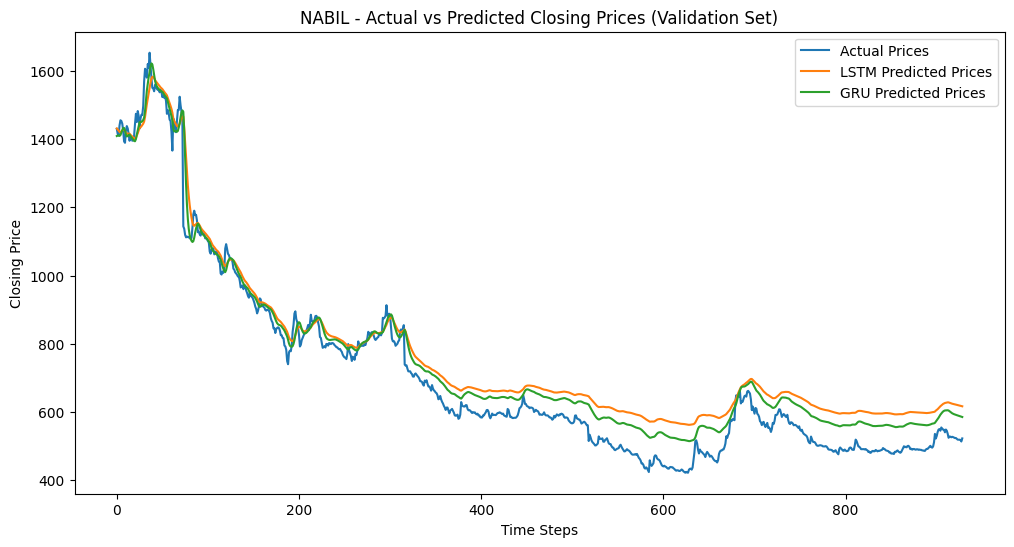

Loaded LSTM model and scaler for NBL
Loaded GRU model and scaler for NBL


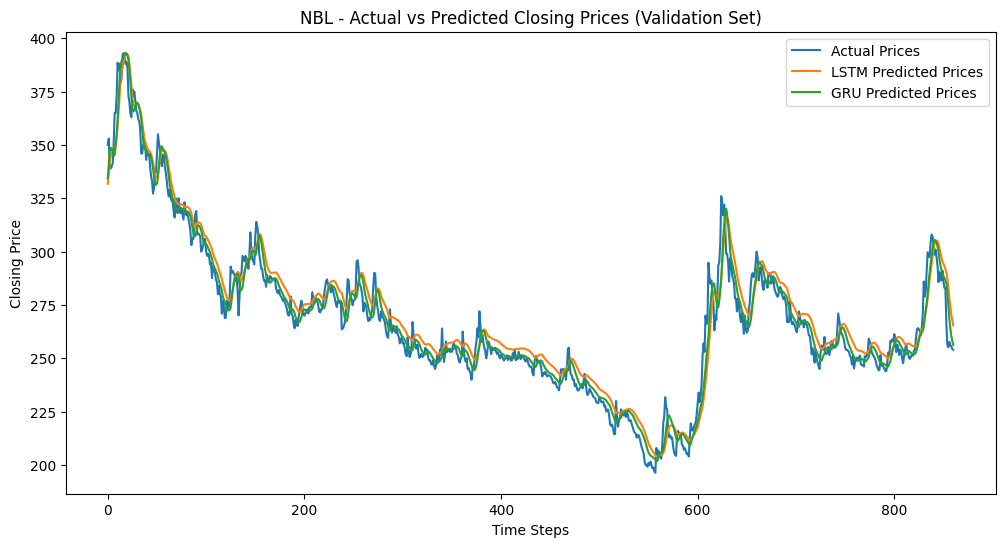

Loaded LSTM model and scaler for NICA
Loaded GRU model and scaler for NICA


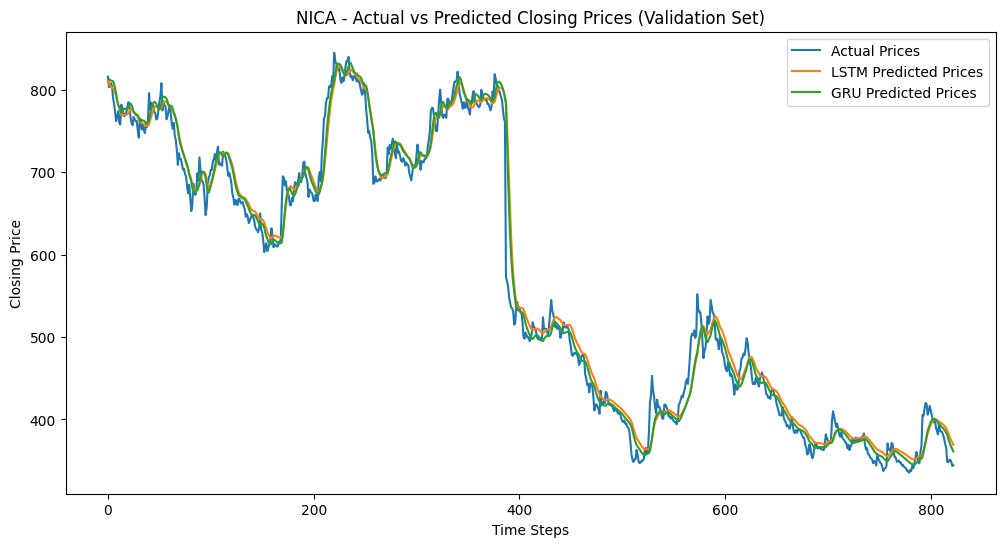

Loaded LSTM model and scaler for NIMB
Loaded GRU model and scaler for NIMB


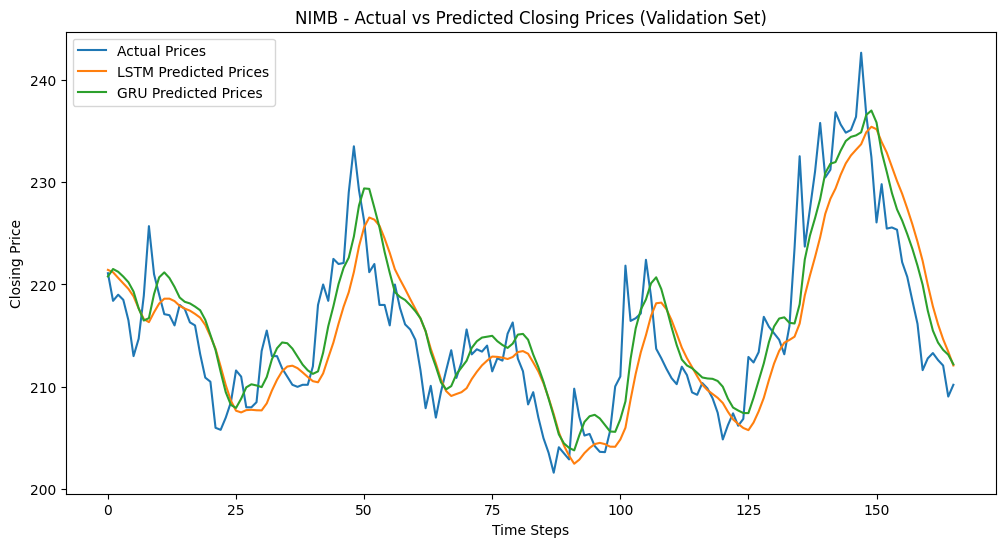

Loaded LSTM model and scaler for NMB
Loaded GRU model and scaler for NMB


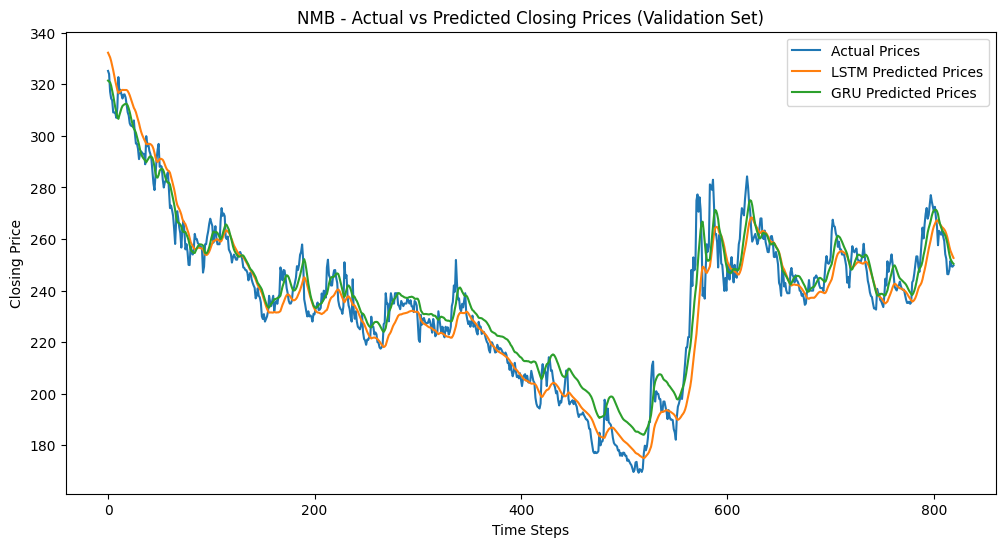

Loaded LSTM model and scaler for PRVU
Loaded GRU model and scaler for PRVU


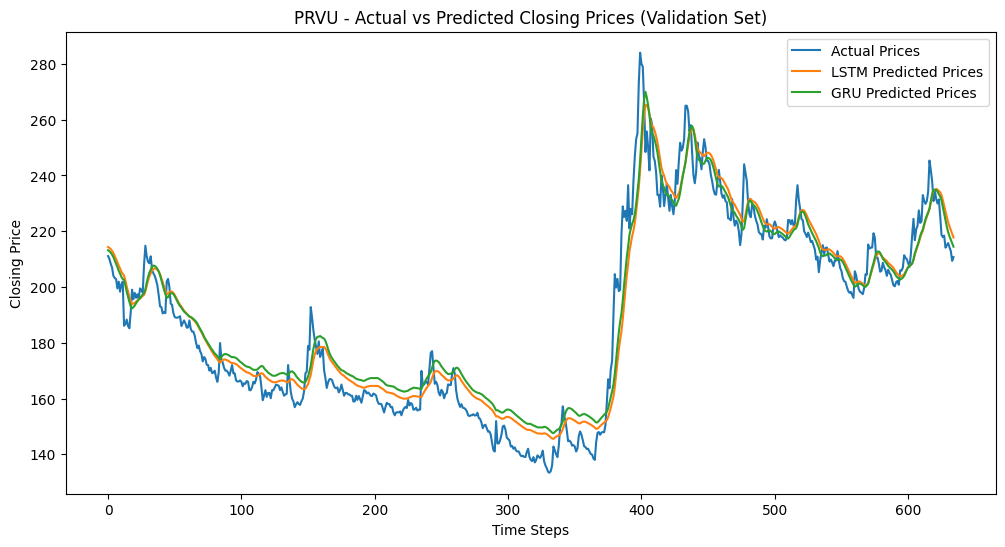


--- Plotting complete ---


In [42]:

import matplotlib.pyplot as plt

print("\n--- Plotting Validation Predictions vs Actuals ---")

for Symbol in lstm_models.keys(): # Iterate through the symbols that have trained models
    # Get the validation data for the current Symbol
    stock_df = df_filtered[df_filtered['Symbol'] == Symbol].copy()
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    stock_df = stock_df.sort_values('Date').reset_index(drop=True)
    close_prices = stock_df['Close'].values.reshape(-1, 1)

    # Load both LSTM and GRU scalers for the current Symbol
    lstm_scaler = lstm_scalers.get(Symbol)
    gru_scaler = gru_scalers.get(Symbol)

    if lstm_scaler is None or gru_scaler is None:
        print(f"Scaler not found for {Symbol}. Skipping plotting.")
        continue

    # Scale the prices using one of the scalers (StandardScaler fit on the whole data)
    scaled_prices = lstm_scaler.transform(close_prices) # Scaler is the same for both models

    # Create sequences for validation
    X, y = create_sequences(scaled_prices, SEQUENCE_LENGTH)

    train_size = int(len(X) * TRAIN_SPLIT_PERCENT)
    X_val, y_val = X[train_size:], y[train_size:]

    # Convert to PyTorch Tensors and move to the selected device
    X_val = torch.from_numpy(X_val).float().to(device)
    y_val = torch.from_numpy(y_val).float().to(device)

    # Load both LSTM and GRU models for the current Symbol
    lstm_model, _ = load_stock_model(Symbol, model_dir, model_type='LSTM')
    gru_model, _ = load_stock_model(Symbol, model_dir, model_type='GRU')

    if lstm_model is None or gru_model is None:
        print(f"Models not found for {Symbol}. Skipping plotting.")
        continue

    # Make predictions on the validation set using both models
    lstm_model.eval()
    gru_model.eval()
    with torch.no_grad():
        y_pred_val_scaled_lstm = lstm_model(X_val)
        y_pred_val_scaled_gru = gru_model(X_val)


    # Inverse transform the predictions and actual values
    y_val_actual = lstm_scaler.inverse_transform(y_val.cpu().numpy()) # Use either scaler
    y_pred_val_lstm = lstm_scaler.inverse_transform(y_pred_val_scaled_lstm.cpu().numpy())
    y_pred_val_gru = gru_scaler.inverse_transform(y_pred_val_scaled_gru.cpu().numpy())


    # Plot the actual vs predicted values for both models
    plt.figure(figsize=(12, 6))
    plt.plot(y_val_actual, label='Actual Prices')
    plt.plot(y_pred_val_lstm, label='LSTM Predicted Prices')
    plt.plot(y_pred_val_gru, label='GRU Predicted Prices')
    plt.title(f'{Symbol} - Actual vs Predicted Closing Prices (Validation Set)')
    plt.xlabel('Time Steps')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

print("\n--- Plotting complete ---")


In [43]:

from google.colab import files
import shutil

# First, zip the trained_models folder
shutil.make_archive("trained_models", 'zip', "trained_models")

# Then download the zip file
files.download("trained_models.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary:

### Data Analysis Key Findings

*   The `LSTMModel` class was successfully modified to support both LSTM and GRU model types, allowing the user to select the architecture.
*   The `train_all_stock_models` function was updated to implement 5-fold cross-validation for each stock.
*   Within each fold, both LSTM and GRU models were trained and evaluated on the validation set.
*   Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) were calculated for both models in each fold.
*   The average MSE and MAPE across all folds were computed and printed for both LSTM and GRU models for each stock.
*   The trained models and their corresponding `StandardScaler` instances from the last fold were stored for each stock.
*   The plotting code was updated to visualize the actual vs. predicted prices from both the LSTM and GRU models on the validation set for each stock, allowing for visual comparison of their performance.

### Insights or Next Steps

*   Compare the average MAPE and MSE scores for LSTM and GRU models across all stocks to determine which architecture generally performs better for this dataset.
*   Implement a function that allows the user to input a stock symbol and a desired model type (LSTM or GRU) to load the corresponding trained model and scaler for making future predictions.
